In [2]:
# 한글 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (24.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [3]:
# 파일 불러오기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train_features = pd.read_csv('/content/drive/MyDrive/과제3/train_features.csv').set_index(['점포코드'])
val_test_features = pd.read_csv('/content/drive/MyDrive/과제3/val_test_feature.csv').set_index('점포코드')

In [4]:
train_features.iloc[:,:-1]

,age_sales,cust_strscount,vip_strscount,sml_salespct,lge_salespct,sml_custport,lge_custport,revisitport,car_regi,f_cnt_grade,...,제휴사,upperclass,lowclass,purtime,midclass,AVG_PUR,STORE_CNT,SUM,RATE,AGE_REGION_RATE
점포코드,,,,,,,,,,,,,,,,,,,,,
A1,4.689223,-0.040256,0.092224,0.003361,0.056154,0.007399,0.000103,-0.003007,63801,0,...,1,0.0,0.0,-1,0.0,0,0,0,12,1
A12,5.116779,0.026294,-0.186111,0.052243,-0.020977,0.004684,-0.000128,0.020648,195473,0,...,1,0.0,0.0,3,46.0,0,0,0,14,1
A2,5.380300,-0.013771,0.088754,0.031374,-0.013618,0.003514,-0.000028,0.015171,177518,0,...,1,0.0,1003.0,1,0.0,1,0,0,13,1
A20,5.032316,-0.051214,0.050765,0.045283,-0.000613,0.008195,0.000051,0.027951,124704,0,...,1,0.0,0.0,0,13.0,0,0,0,13,1
A24,5.124620,0.018105,-0.108316,0.058753,0.043144,0.015083,0.000343,-0.030836,57200,0,...,1,0.0,0.0,1,0.0,1,0,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D4,4.251045,-0.070000,1.600000,0.000000,0.023254,0.000000,-0.000423,-0.055000,57200,1,...,4,0.0,-511.0,4,0.0,1,1,1,18,10
D5,0.146949,-0.532258,-5.000000,0.151904,-0.046409,0.005487,0.001122,-0.131514,195473,-2,...,4,-13.0,-511.0,0,33.0,1,0,0,14,3
D6,1.178561,-0.176005,-0.650000,0.095493,-0.072128,0.007797,-0.007011,0.009888,57200,-1,...,4,13.0,-1758.0,0,0.0,1,0,0,13,2


In [5]:
# 결측치 없애기기
train_features = train_features.fillna(0)
val_test_features = val_test_features.fillna(0)

In [6]:
# 값을 나눠주기기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train = train_features.iloc[:,:-1]
y_train = train_features.iloc[:,-1]

X_test = val_test_features.iloc[:,:-1]
y_test = val_test_features.iloc[:,-1]


# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [7]:
# 그냥 회귀로만 돌리기
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds =lr_clf.predict(X_test)

print('accuracy:{0:.3f},roc_auc:{1:.3f}'.format(accuracy_score(y_test,lr_preds),roc_auc_score(y_test,lr_preds)))

accuracy:0.546,roc_auc:0.550


In [ ]:
accuracy:0.546,roc_auc:0.550

로지스틱 파라미터 solver p351~353

In [ ]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train,y_train)
    lr_preds= lr_clf.predict(X_test)

    print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test,lr_preds),roc_auc_score(y_test,lr_preds)))

solver:lbfgs, accuracy:0.546, roc_auc:0.550
solver:liblinear, accuracy:0.712, roc_auc:0.711


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

solver:newton-cg, accuracy:0.730, roc_auc:0.727
solver:sag, accuracy:0.479, roc_auc:0.486
solver:saga, accuracy:0.460, roc_auc:0.469


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWa

In [ ]:
solvers = ['liblinear','newton-cg']

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train,y_train)
    lr_preds= lr_clf.predict(X_test)

    print('solver:{0}, accuracy:{1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test,lr_preds),roc_auc_score(y_test,lr_preds)))

In [ ]:
solver:liblinear, accuracy:0.712, roc_auc:0.711
solver:newton-cg, accuracy:0.730, roc_auc:0.727

### 파라미터 사용 후 정확도 더 올라감.

In [11]:
solvers = ['newton-cg']
for solver in solvers:
    rf_clf1 = LogisticRegression(solver=solver, max_iter=600)
    rf_clf1.fit(X_train, y_train)
    pred = rf_clf1.predict(X_test)
    pred_prob = rf_clf1.predict_proba(X_test)[:,1]
    print(get_clf_eval(y_test, pred, pred_prob))

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

오차행렬
[[74  9]
 [35 45]]
정확도: 0.7301, 정밀도: 0.8333, 재현율: 0.5625, f1: 0.6716, auc: 0.8133
None


/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
정확도: 0.7301, 정밀도: 0.8333, 재현율: 0.5625, f1: 0.6716, auc: 0.8133

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_ts, preds=None, pred_proba=None):
    confusion = confusion_matrix(y_ts, preds)
    accuracy = accuracy_score(y_ts, preds)
    precision = precision_score(y_ts, preds)
    recall = recall_score(y_ts, preds)
    f1 = f1_score(y_ts, preds)
    roc_auc = roc_auc_score(y_ts, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, auc: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
rf_clf1 = LogisticRegression()
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
pred_prob = rf_clf1.predict_proba(X_test)[:,1]
get_clf_eval(y_test, pred, pred_prob)


오차행렬
[[29 54]
 [20 60]]
정확도: 0.5460, 정밀도: 0.5263, 재현율: 0.7500, f1: 0.6186, auc: 0.5825


In [ ]:
정확도: 0.7347, 정밀도: 0.7838, 재현율: 0.8529, f1: 0.8169, auc: 0.7314

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def feature_graph(rf_clf1):
  ftr_importances_values = rf_clf1.feature_importances_
  ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
  ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

  plt.figure(figsize=(8,6))
  plt.title('Feature importances Top 20')
  sns.barplot(x=ftr_top20, y=ftr_top20.index)
  plt.show()

### 군집화

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*', '_']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [ ]:
import pandas as pd

train_features = pd.read_csv('/content/drive/MyDrive/과제3/train_features.csv')

In [ ]:
train_features.isna().sum()

점포코드                0
age_sales           0
cust_strscount      0
vip_strscount       0
sml_salespct        0
lge_salespct        0
sml_custport        0
lge_custport        0
revisitport         0
car_regi            0
f_cnt_grade         0
f_amt_grade         0
m_cnt_grade         0
m_amt_grade         0
WORK               39
WK_COUNT           39
work_e_count       39
work_l_count       39
ESSENTIAL          39
LUXURY             39
인구증감                0
제휴사                 0
upperclass          0
lowclass            0
purtime             0
midclass            0
AVG_PUR             0
STORE_CNT           0
SUM                 0
RATE                0
AGE_REGION_RATE     0
Y                   0
dtype: int64

In [ ]:
train_features.fillna(0, inplace=True)

In [ ]:
import numpy as np
a = train_features.iloc[:, 1:-1]
aa = np.array(a)
aa

array([[ 4.68922339e+00, -4.02562651e-02,  9.22238028e-02, ...,
         0.00000000e+00,  1.20000000e+01,  1.00000000e+00],
       [ 5.11677855e+00,  2.62936722e-02, -1.86111111e-01, ...,
         0.00000000e+00,  1.40000000e+01,  1.00000000e+00],
       [ 5.38030005e+00, -1.37705591e-02,  8.87542088e-02, ...,
         0.00000000e+00,  1.30000000e+01,  1.00000000e+00],
       ...,
       [ 1.17856124e+00, -1.76005274e-01, -6.50000000e-01, ...,
         0.00000000e+00,  1.30000000e+01,  2.00000000e+00],
       [ 7.12681511e+00, -1.66104959e-01, -1.30000000e+00, ...,
        -1.00000000e+00,  8.00000000e+00,  2.00000000e+00],
       [-1.38027025e+00, -1.27272727e+00, -1.00000000e+00, ...,
        -1.00000000e+00,  1.40000000e+01,  2.00000000e+00]])

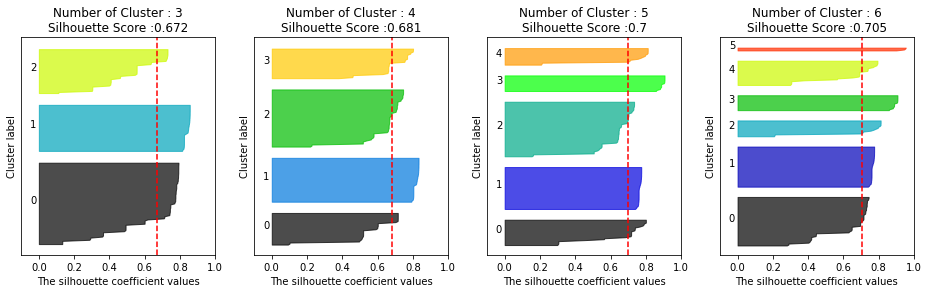

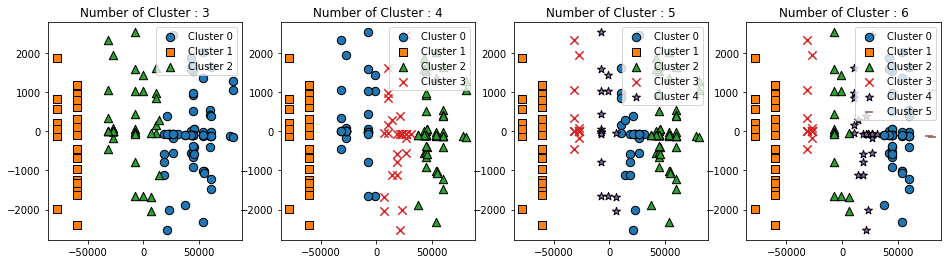

In [ ]:
import matplotlib.pyplot as plt

visualize_silhouette([3, 4, 5, 6], aa)
visualize_kmeans_plot_multi([3, 4, 5, 6], aa)

IndexError: ignored

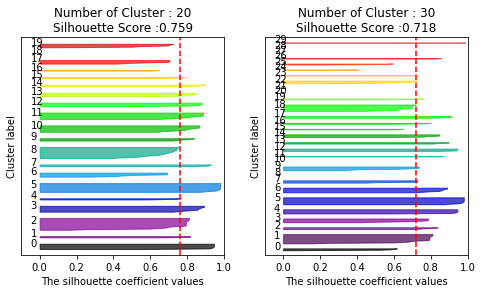

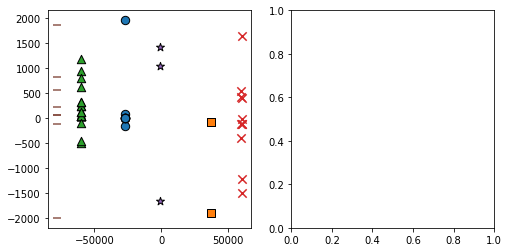

In [ ]:
visualize_silhouette([20,30], aa)
visualize_kmeans_plot_multi([20,30], aa)